In [322]:
#importing all the important libraries
import sklearn.preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
 
import sklearn as sk
from sklearn import metrics
from sklearn.model_selection import train_test_split, ShuffleSplit, learning_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
 
warnings.filterwarnings('ignore')

In [323]:
df_train=pd.read_csv('/content/drive/MyDrive/ML/ML A2/Train - Train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/ML/ML A2/test - test.csv')
display(df_train.shape)
display(df_test.shape)

(44550, 41)

(14850, 41)

In [324]:
#checking the sample of train data 

df_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,7411,7.0,2013-03-20,Germany Republi,1203,CES,37.228664,-3.256505,Kwa Abdalla,0,Pangani,Mafurini,Kilimanjaro,3,5,Hai,Machame Kaskazini,90,True,GeoData Consultants Ltd,Water Board,Machame water supply,True,2008,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,18014,0.0,2011-02-21,Cdtf,1409,CDTF,34.615481,-9.972601,none,0,Lake Nyasa,Ituni,Iringa,11,5,Ludewa,Luana,70,False,GeoData Consultants Ltd,Private operator,Mgowel,False,1984,gravity,gravity,gravity,private operator,commercial,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,26103,0.0,2013-01-04,Government Of Tanzania,1572,DWE,36.658778,-3.321529,Kwa Loishiye,0,Pangani,Melebuki,Arusha,2,2,Arusha Rural,Kimnyaki,150,True,GeoData Consultants Ltd,VWC,Saitero olosaita pipe line,True,2002,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
3,31140,0.0,2011-04-03,District Council,0,District Council,33.628025,-8.860795,Mwanzechele,0,Rufiji,Darajani,Mbeya,12,2,Mbeya Rural,Inyala,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,wug,user-group,pay annually,annually,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional
4,12286,300.0,2013-03-08,District Council,1283,District Council,37.655509,-3.669777,Kwa Kidaya,0,Pangani,Mwira A,Kilimanjaro,3,2,Mwanga,Shinghatini,34,True,GeoData Consultants Ltd,VWC,Churu water supply,False,2007,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [325]:
#unique and null values 
for col in df_train.columns.values:
  list_vals = pd.unique(df_train[col]) #list of unique values
  print('\033[1m' + col + '\033[0m' + ' has ' + str(len(list_vals))  +' unique values, ' + '\033[1m' + str(df_train[col].isna().sum()) + '\033[0m' + ' null entries and datatype ' + '\033[1m' + str(df_train[col].dtype) + '\033[0m')
  if len(list_vals) < 10:
    list_str = ''
    for n in range(0, len(list_vals)):
      list_str = list_str + str(list_vals[n]) + ', '
    print('\033[1m' + '    ##### These are: '+ '\033[0m' +list_str[0:len(list_str) - 2])

id has 44550 unique values, 0 null entries and datatype int64
amount_tsh has 85 unique values, 0 null entries and datatype float64
date_recorded has 346 unique values, 0 null entries and datatype object
funder has 1652 unique values, 2793 null entries and datatype object
gps_height has 2396 unique values, 0 null entries and datatype int64
installer has 1855 unique values, 2807 null entries and datatype object
longitude has 43155 unique values, 0 null entries and datatype float64
latitude has 43155 unique values, 0 null entries and datatype float64
wpt_name has 28991 unique values, 0 null entries and datatype object
num_private has 59 unique values, 0 null entries and datatype int64
basin has 9 unique values, 0 null entries and datatype object
    ##### These are: Pangani, Lake Nyasa, Rufiji, Lake Tanganyika, Lake Victoria, Wami / Ruvu, Internal, Ruvuma / Southern Coast, Lake Rukwa
subvillage has 16618 unique values, 287 null entries and datatype object
region has 21 unique values, 0 nu

#**DATA PREPROCESSING**

In [326]:
#Dropping of the varible which has too many numerical value
#since it will not play significant role in the output
 

#dropping the variable wpt_name since it has too many distinct  numerical values from both train and test
#Dropping the wpt_name variable more than 50% different values
df_train.drop(['wpt_name'], axis=1, inplace=True)
df_test.drop(['wpt_name'], axis=1, inplace=True)

In [327]:
#Dropping the id variable since it does not have any significance in the water pipeline functioning
df_train.drop(['id'], axis=1, inplace=True)
df_test.drop(['id'], axis=1, inplace=True)

In [329]:
#DATA PREPROCESSING
#we have date recorded as datatype object converting it to integer
#converting the date format dd-mm-yyyy to yyyymmdd and converting it to the integer type data 
#for training
df_train['date_recorded'] = pd.to_datetime(df_train['date_recorded']).dt.strftime("%Y%m%d")
df_train['date_recorded'] = df_train['date_recorded'].astype(int)
print( 'datatype od df_test changed to ', df_train['date_recorded'].dtype )

#for testing
df_test['date_recorded'] = pd.to_datetime(df_test['date_recorded']).dt.strftime("%Y%m%d")
df_test['date_recorded'] = df_test['date_recorded'].astype(int)
print( 'datatype od df_test changed to ',df_test['date_recorded'].dtype )

datatype od df_test changed to  int64
datatype od df_test changed to  int64


In [ ]:
df_train['date_recorded'].nunique() #no. of unique values in date recorded

346

In [330]:
# Find columns with 'object' dtypes.
list(df_train.select_dtypes(np.number))

['amount_tsh',
 'date_recorded',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

#initially checking the correlation between variables to amongst the numerical values 

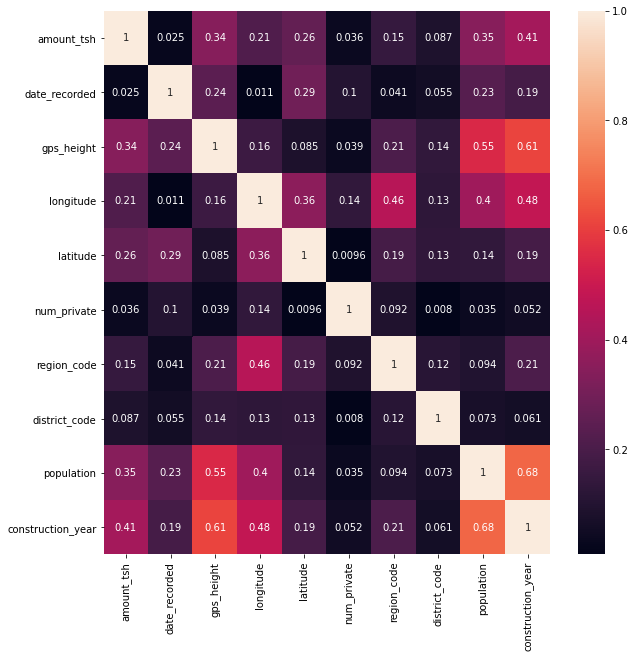

In [331]:
# visualization of correlation by heatmap for red wine

corr = df_train.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(abs(corr), annot = True)
plt.show()

From above its comes to notice that Most of the numerical varible columns are not correlated with each other.

In [332]:
# Find columns with 'object' dtypes.
list(df_train.select_dtypes(exclude=[np.number]))

['funder',
 'installer',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group']

#features having **Non-Numeric Value** as content are: 
['funder','installer','basin','subvillage','region','lga', 'ward','public_meeting','recorded_by','scheme_management','scheme_name','permit','extraction_type', 'extraction_type_group','extraction_type_class','management', 'management_group', 'payment','payment_type','water_quality','quality_group', 'quantity','quantity_group', 'source', 'source_type', 'source_class','waterpoint_type','waterpoint_type_group', 'status_group']

# Missing value 
funder has , 2793 null entries and datatype object \
installer , 2807 null entries and datatype object \
subvillage, 287 null entries and datatype object \
 public_meeting , 2491 null entries and datatype object\
 scheme_management , 2832 null entries and datatype object \
scheme_name , 21110 null entries and datatype object \
permit has , 2336 null entries and datatype object 


##Imputation of the missing values with most frequent values using **mode** value of the column.

And cross checking after the imputation

In [333]:
#Imputation of the missing values with most frequent values using mode.
#Imputing the missing values
df_train['permit'].fillna(df_train['permit'].mode()[0], inplace=True)
df_train['funder'].fillna(df_train['funder'].mode()[0], inplace=True)
df_train['scheme_management'].fillna(df_train['scheme_management'].mode()[0], inplace=True)
df_train['public_meeting'].fillna(df_train['public_meeting'].mode()[0], inplace=True)
df_train['subvillage'].fillna(df_train['subvillage'].mode()[0], inplace=True)
df_train['installer'].fillna(df_train['installer'].mode()[0], inplace=True)
df_train['scheme_name'].fillna(df_train['scheme_name'].mode()[0], inplace=True)

In [334]:
#Imputation of the missing values with most frequent values using mode.
#Imputing the missing values
df_test['permit'].fillna(df_test['permit'].mode()[0], inplace=True)
df_test['funder'].fillna(df_test['funder'].mode()[0], inplace=True)
df_test['scheme_management'].fillna(df_test['scheme_management'].mode()[0], inplace=True)
df_test['public_meeting'].fillna(df_test['public_meeting'].mode()[0], inplace=True)
df_test['subvillage'].fillna(df_test['subvillage'].mode()[0], inplace=True)
df_test['installer'].fillna(df_test['installer'].mode()[0], inplace=True)
df_test['scheme_name'].fillna(df_test['scheme_name'].mode()[0], inplace=True)

In [335]:
#Dropping of the unnecessary column from the test data
df_test.drop(['Unnamed: 0'], axis=1, inplace=True)

In [336]:
#After the imputation of the vlues in the columns of the dataframe checking if there is any missing value in the data
df_test.isnull().sum()

amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
w

In [337]:
df_train.shape

(44550, 39)

In [338]:
#encoding with ordinal encoder to train data
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for col in df_train.columns:
  df_train[col] = enc.fit_transform(df_train[[col]])

In [339]:
#for test data
for col in df_test.columns:
  df_test[col] = enc.fit_transform(df_test[[col]])

In [340]:
#Dropping the variables
df_test.drop(['recorded_by'], axis=1, inplace=True)


In [341]:
df_train.drop(['recorded_by'], axis=1, inplace=True)

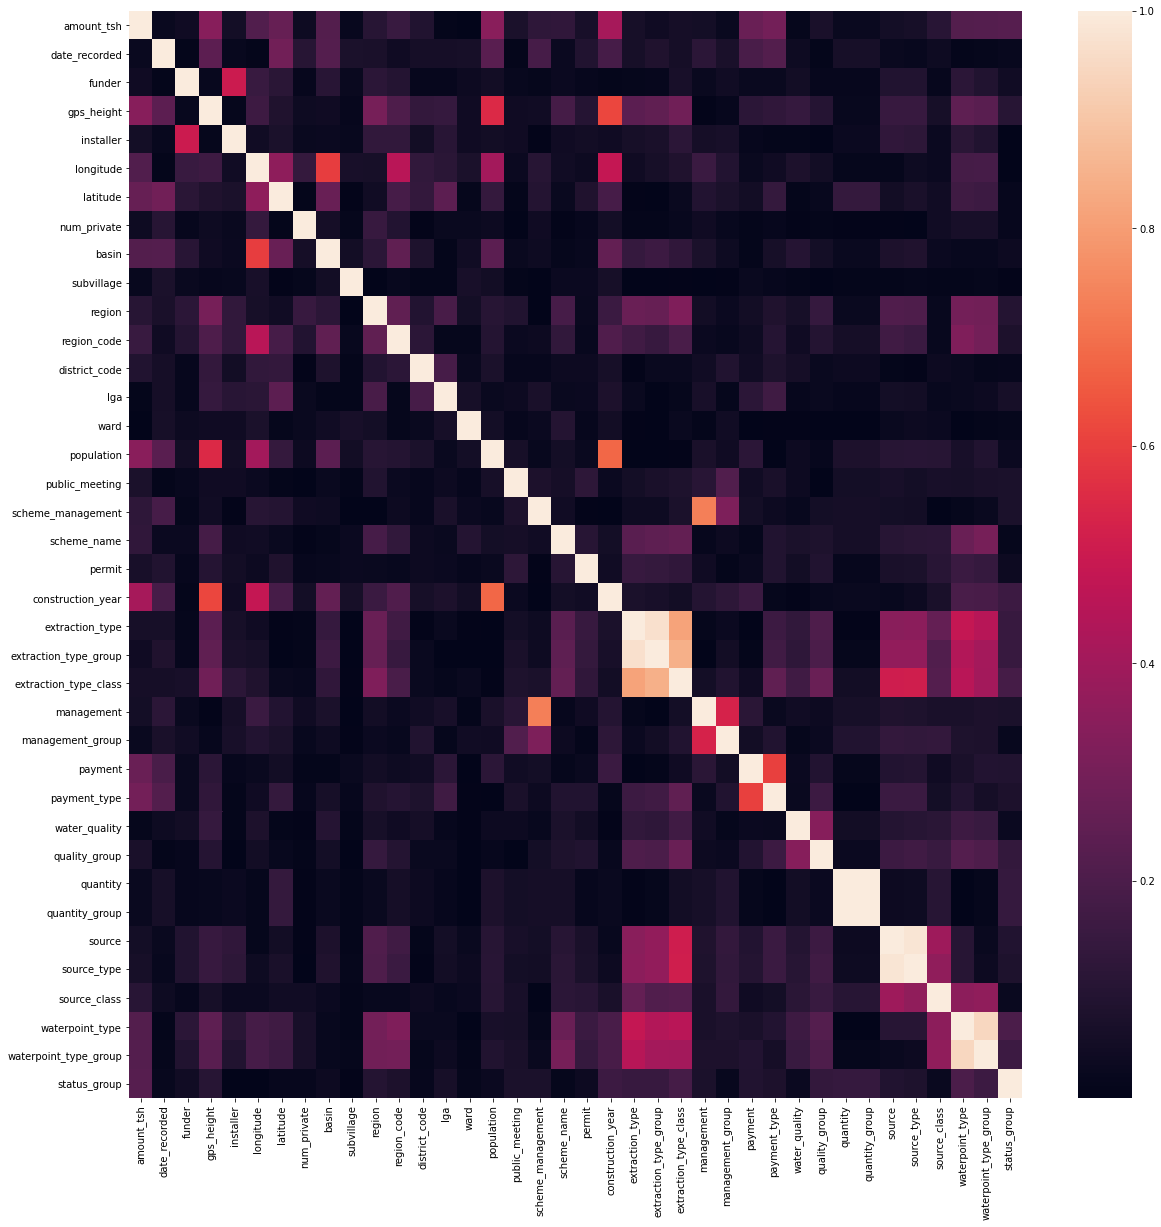

In [342]:
#Correlation of the newly encoded variables
# visualization of correlation by heatmap

corr = df_train.corr(method = 'spearman')
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(abs(corr), annot = False)
plt.show()

In [343]:
#extraction type
df_train.columns.values

array(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'num_private', 'basin', 'subvillage',
       'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source',
       'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'], dtype=object)

In [344]:
df_test.columns.values

array(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'num_private', 'basin', 'subvillage',
       'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source',
       'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'], dtype=object)

In [345]:
#Dropping the variables extraction_type_class , and group has near to unity correlation
df_train.drop(['extraction_type_group'], axis=1, inplace=True)
df_train.drop(['extraction_type_class'], axis=1, inplace=True)

In [346]:
#test Dropping the variables extraction_type_class , and group has near to unity correlation
df_test.drop(['extraction_type_group'], axis=1, inplace=True)
df_test.drop(['extraction_type_class'], axis=1, inplace=True)

In [347]:
#train test Dropping the variables quantity_group has near to unity correlation
df_train.drop(['quantity_group'], axis=1, inplace=True)
df_test.drop(['quantity_group'], axis=1, inplace=True)

In [348]:
#train test Dropping the variables source_type and source has near to unity correlation
df_train.drop(['source_type'], axis=1, inplace=True)
df_test.drop(['source_type'], axis=1, inplace=True)

In [349]:
#train test Dropping the variables waterpoint_type_group and waterpoint_type has near to unity correlation
df_train.drop(['waterpoint_type_group'], axis=1, inplace=True)
df_test.drop(['waterpoint_type_group'], axis=1, inplace=True)

In [350]:
display(df_train.shape)
display(df_test.shape)

(44550, 33)

(14850, 32)

In [351]:
#train data
X = pd.DataFrame(df_train.iloc[:,0:-1])
Y = pd.DataFrame(df_train['status_group'])

In [352]:
#test data processed
Xt = pd.DataFrame(df_test)

In [353]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


#**1.0 RFClassification**

In [354]:
#RFC
#Hyperparameter tunung
rf = RandomForestClassifier(criterion='gini',n_estimators=500,max_features='auto',oob_score=True,random_state=1,n_jobs=-1)
param_grid = {"min_samples_split" : [4, 6, 8],"n_estimators" : [500, 700, 1000]}

gs = GridSearchCV(estimator=rf,param_grid=param_grid,scoring='accuracy',cv=2,n_jobs=-1)

gs = gs.fit(X_train, y_train.values.ravel())

print(gs.best_score_)
print(gs.best_params_)

0.7888970785312248
{'min_samples_split': 6, 'n_estimators': 700}


In [355]:
gs.best_estimator_.feature_importances_

array([0.02624758, 0.0505222 , 0.0342603 , 0.04281361, 0.02975738,
       0.07936963, 0.07577333, 0.00122261, 0.01328392, 0.05208837,
       0.01676589, 0.0150217 , 0.01824166, 0.02666965, 0.03985745,
       0.03146935, 0.00521997, 0.01155649, 0.02730021, 0.00587742,
       0.04370495, 0.04067509, 0.01491027, 0.0058288 , 0.01897732,
       0.01638281, 0.01035214, 0.01162825, 0.1380757 , 0.02323805,
       0.00654654, 0.06636136])

In [356]:
rf32 = RandomForestClassifier(criterion='gini',min_samples_split=6,n_estimators=700,max_features='auto',oob_score=True,random_state=1,n_jobs=-1)
                            
rf32.fit(X_train, y_train.values.ravel())
print('RFC has oob score after 1st elimination is :',rf32.oob_score_)


RFC has oob score after 1st elimination is : 0.8056486196730099


In [357]:
prediction = rf32.predict(X_test)
print('Accuracy for RFC is', metrics.accuracy_score(y_test, prediction))

Accuracy for RFC is 0.8000952251394368


In [358]:
rf32.feature_importances_

array([0.02624758, 0.0505222 , 0.0342603 , 0.04281361, 0.02975738,
       0.07936963, 0.07577333, 0.00122261, 0.01328392, 0.05208837,
       0.01676589, 0.0150217 , 0.01824166, 0.02666965, 0.03985745,
       0.03146935, 0.00521997, 0.01155649, 0.02730021, 0.00587742,
       0.04370495, 0.04067509, 0.01491027, 0.0058288 , 0.01897732,
       0.01638281, 0.01035214, 0.01162825, 0.1380757 , 0.02323805,
       0.00654654, 0.06636136])

#**2.0 XGBoost Classification**

In [362]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',silent=True, nthread=1)
folds = 3
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average = 'weighted')
params = {'min_child_weight': [1, 5, 10],'gamma': [0.5, 1, 1.5, 2, 5],'subsample': [0.6, 0.8, 1.0],'colsample_bytree': [0.6, 0.8, 1.0],'max_depth': [3, 4, 5]  }
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring=scorer, n_jobs=4, cv=skf.split(X_train,y_train ), verbose=3, random_state=1001 )
random_search.fit(X_train, y_train )

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed: 10.5min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fe66e890c50>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.02, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=600,
                                           n_jobs=1, nthread=1,
                                           objective='binary:logist...
                                           seed=None, silent=True, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=4,
                   param_distributions={'colsample

In [363]:
print('best score xgb ' ,random_search.best_score_ )
print('xgb best parameters ' ,random_search.best_params_ )
print('best indexx xgb ' ,random_search.best_index_ )
print('best estimator xgb ' ,random_search.best_estimator_ )

best score xgb  0.75399236221129
xgb best parameters  {'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 1.5, 'colsample_bytree': 0.8}
best indexx xgb  1
best estimator xgb  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.6, verbosity=1)


In [364]:
#Applying the best parameters of the xgboost to model and testing the model on test data.
xgb32=random_search.best_estimator_

xgb32.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.6, verbosity=1)

In [365]:
xgb32.feature_importances_

array([0.0462949 , 0.01619986, 0.01752931, 0.01707107, 0.01616328,
       0.02376452, 0.01640674, 0.01277481, 0.02424673, 0.01005085,
       0.02871218, 0.02235642, 0.01806406, 0.02134535, 0.01183366,
       0.0141106 , 0.02705525, 0.01536601, 0.01416728, 0.0191035 ,
       0.02868589, 0.03501341, 0.03257824, 0.02063816, 0.03585385,
       0.02510552, 0.01965024, 0.02040447, 0.20942442, 0.03958386,
       0.02705507, 0.11339048], dtype=float32)

In [366]:
prediction = xgb32.predict(X_test)
print('Accuracy xgb is', metrics.accuracy_score(y_test, prediction))

Accuracy xgb is 0.7749285811454224


#**3.0 KNN**

In [368]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
k_range = list(range(5,10))

param_grid = dict(n_neighbors=k_range)

pipe = Pipeline([('sc', StandardScaler()),('knn', KNeighborsClassifier(algorithm='brute'))])
params = {'knn__n_neighbors': k_range }
clf = GridSearchCV(estimator=pipe,param_grid=params, cv=5,return_train_score=True) # Turn on cv train scores
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='brute',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             i

In [369]:
print('best score knn ' ,clf.best_score_ )
print('knn best parameters ' ,clf.best_params_ )
print('best indexx knn ' , clf.best_index_ )
print('best estimator knn ' ,clf.best_estimator_ )

best score knn  0.7319751603272407
knn best parameters  {'knn__n_neighbors': 5}
best indexx knn  0
best estimator knn  Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='brute', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)


#Observations We are having 3 frameworks for prediction of the 
1. RandomForestClassifer having accuracy of **80** percent approx
2. XGBoost Classifier having the accuracy of the  **78** percent approx
3. KNN Classifier having Accuracy of  **77** percent \
 \
 \
 So we will select the RFClassification for the further round of the best feature extraction

#**1.1 RFC Round 2 of feature elimination.**

# 2. Checking the importance of a particular feature with respect to the feature importance score

In [370]:
#Round 2 of feature elimination
#Checking the importance of the features with respect to the feature importance score obtained fron rf model
RFC_feature=rf32.feature_importances_
column_name=X.columns
dff=pd.DataFrame(X.columns,rf32.feature_importances_)
val=pd.DataFrame(RFC_feature)
nam=pd.DataFrame(column_name)
nam.rename( columns={0 :'Feaures'}, inplace=True ) 
val.rename( columns={0 :'Importance'}, inplace=True ) 
df1 = pd.concat([val,nam], axis=1)
df1.sort_values(by=['Importance'])

,Importance,Feaures
7,0.001223,num_private
16,0.005220,public_meeting
23,0.005829,management_group
19,0.005877,permit
30,0.006547,source_class
26,0.010352,water_quality
17,0.011556,scheme_management
27,0.011628,quality_group
8,0.013284,basin
22,0.014910,management


#**1.1.1 Round 2Feature elimination**
As from above it is clear that the minimum importance is of the variable 

1.	0.001223	num_private \
2.	0.005220	public_meeting \
3.	0.005829	management_group \
4.	0.005877	permit \
5.	0.006547	source_class



In [371]:
#storing the original dataset to new variable for feature elimination
X2=X
Y2=Y 
Xt2=Xt

In [372]:
#31
X2.drop(['num_private'], axis=1, inplace=True)
Xt2.drop(['num_private'], axis=1, inplace=True)

In [373]:
#30
X2.drop(['public_meeting'], axis=1, inplace=True)
Xt2.drop(['public_meeting'], axis=1, inplace=True)

In [374]:
#29
X2.drop(['management_group'], axis=1, inplace=True)
Xt2.drop(['management_group'], axis=1, inplace=True)

In [375]:
#28
X2.drop(['permit'], axis=1, inplace=True)
Xt2.drop(['permit'], axis=1, inplace=True)

In [376]:
#27
X2.drop(['source_class'], axis=1, inplace=True)
Xt2.drop(['source_class'], axis=1, inplace=True)

In [377]:
X2.shape

(44550, 27)

In [378]:
Xt2.shape

(14850, 27)

In [379]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X2, Y2, test_size=0.33, random_state=42)

In [380]:
#RFC
#Hyperparameter tunung
rf = RandomForestClassifier(criterion='gini',n_estimators=500,max_features='auto',oob_score=True,random_state=1,n_jobs=-1)
param_grid = {"min_samples_split" : [4, 6, 8],"n_estimators" : [500, 700, 1000]}

gs1 = GridSearchCV(estimator=rf,param_grid=param_grid,scoring='accuracy',cv=2,n_jobs=-1)

gs1 = gs1.fit(X1_train, y1_train.values.ravel())

print(gs1.best_score_)
print(gs1.best_params_)

0.7888300723666577
{'min_samples_split': 8, 'n_estimators': 500}


In [394]:
rf321 = RandomForestClassifier(criterion='gini',min_samples_split=8,n_estimators=500,max_features='auto',oob_score=True,random_state=1,n_jobs=-1)
                            
rf321.fit(X1_train, y1_train.values.ravel())
print('oob score RFC after r2 elimination is',rf321.oob_score_)

oob score RFC after r2 elimination is 0.8059836504958456


In [382]:
prediction = rf321.predict(X1_test)
print('Accuracy is', metrics.accuracy_score(y1_test, prediction))

Accuracy is 0.7996190994422527


In [383]:
p=rf321.feature_importances_

In [384]:
#Currently after round 2 of feature elimination we have pretty much the 

#  Checking the importance of a particular feature with respect to the feature importance score

In [385]:
#Round 3 checking of feature elimination
#Checking the importance of the features with respect to the feature importance score obtained fron rf model
RFC_feature=rf321.feature_importances_
column_name=X2.columns
dff=pd.DataFrame(X.columns,rf321.feature_importances_)
val=pd.DataFrame(RFC_feature)
nam=pd.DataFrame(column_name)
nam.rename( columns={0 :'Feaures'}, inplace=True ) 
val.rename( columns={0 :'Importance'}, inplace=True ) 
df1 = pd.concat([val,nam], axis=1)
df1.sort_values(by=['Importance'])

,Importance,Feaures
23,0.010668,quality_group
22,0.010682,water_quality
15,0.012704,scheme_management
7,0.013083,basin
10,0.015136,region_code
21,0.016205,payment_type
19,0.016685,management
9,0.017143,region
11,0.017885,district_code
20,0.018762,payment


#After feature reduction 2 accuracy is pretty much same
Accuracy is 0.7996190994422527 ,slightly deceased \ 
oob score is 0.8059836504958456 \
Trying to reduce further more features. \




#**1.1.2 Features to eliminate for round 3**
0.010350	quality_group \
22	0.010504	water_quality \
15	0.012171	scheme_management \
7	0.012798	basin \
10	0.014712	region_code \

In [386]:
X3=X2
Y3=Y2 
Xt3=Xt2

In [387]:
#26
X3.drop(['quality_group'], axis=1, inplace=True)
Xt3.drop(['quality_group'], axis=1, inplace=True)

#25
X3.drop(['water_quality'], axis=1, inplace=True)
Xt3.drop(['water_quality'], axis=1, inplace=True)

#24
X3.drop(['scheme_management'], axis=1, inplace=True)
Xt3.drop(['scheme_management'], axis=1, inplace=True)

#23
X3.drop(['basin'], axis=1, inplace=True)
Xt3.drop(['basin'], axis=1, inplace=True)

#22
X3.drop(['region_code'], axis=1, inplace=True)
Xt3.drop(['region_code'], axis=1, inplace=True)

#X3.shape is (44550, 22)
#Xt3.shape is (14850, 22)

#Applying the RFC Framework again by tuning the model and cross checking with the data 

In [388]:
#Round 3 of tuning of parameters
X2_train, X2_test, y2_train, y2_test = train_test_split(X3, Y3, test_size=0.33, random_state=42)

#RFC
#Hyperparameter tuning
rf = RandomForestClassifier(criterion='gini',n_estimators=500,max_features='auto',oob_score=True,random_state=1,n_jobs=-1)
param_grid = {"min_samples_split" : [4, 6, 8],"n_estimators" : [500, 700, 1000]}

gs2 = GridSearchCV(estimator=rf,param_grid=param_grid,scoring='accuracy',cv=2,n_jobs=-1)

gs2= gs2.fit(X2_train, y2_train.values.ravel())

print(gs2.best_score_)
print(gs2.best_params_)

0.7896341463414633
{'min_samples_split': 6, 'n_estimators': 1000}


In [395]:
rf3 = RandomForestClassifier(criterion='gini',min_samples_split=6,n_estimators=1000,max_features='auto',oob_score=True,random_state=1,n_jobs=-1)
                            
rf3.fit(X2_train, y2_train.values.ravel())
print('after 3 round of elimination oob score is : ', rf3.oob_score_)

after 3 round of elimination oob score is :  0.8053135888501742


In [396]:
prediction = rf3.predict(X2_test)
print('Accuracy after 3rd round of elimination is', metrics.accuracy_score(y_test, prediction))

Accuracy after 3rd round of elimination is 0.798938919874847


#Observation After reducing the 5 more features out of 27 remaining feature we are getting pretty much same oob score and the accuracy of the model is increased very slightly



#As we got the accuracy highest for the RFC
Accuracy of RFC initially(32 features): 0.8000952251394368 ,oob score is :0.8056486196730099 \
After 2nd round of elimination(27 features): 0.7996190994422527 ,oob score is :0.8059836504958456  \
After 3rd round of elimination(22 features) : 0.798938919874847 , oob score is :0.8053135888501742

This shows we should consider 1st model only.

#Prediction of the output after round 3 of elimination

We are left with total 22 features almost the accuracy of all the models is same so considering the one 

In [420]:
final_prediction=rf3.predict(Xt3)
final_prediction=pd.DataFrame(final_prediction)
final_prediction

,0
0,2.0
1,2.0
2,0.0
3,2.0
4,0.0
...,...
14845,0.0
14846,0.0
14847,2.0
14848,0.0


In [ ]:
final_prediction.columns[0]

In [440]:
di = {0: "functional", 1: "functional needs repair", 2: "non functional"}
final=final_prediction.replace({final_prediction.columns[0] : di })
final.to_csv('final_203079016.csv', header=False)

In [1]:
Y=Y.replace({Y.columns[0] : di })
df2 = pd.concat([X,Y], axis=1)

NameError: ignored

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
m= TSNE(learning_rate=50)
tsne_features=m.fit_transform(X)
tsne_features[1:4,:]
df['x']= tsne_features[:,0]
df['x']= tsne_features[:,1]
